In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uniprot
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [91]:
seqids, fastas = uniprot.read_fasta(r"C:\Users\marcu\Natural Language Processing\Final_Project\uniprot_sprot.fasta\uniprot_sprot.fasta")

In [115]:
x = fastas[seqids[0]]['sequence']

In [116]:
 y  = ProteinAnalysis(x)

In [117]:
y.aromaticity()

0.1015625

In [118]:
#read file 
sequence_representations = pd.read_csv(r"C:\Users\marcu\Natural Language Processing\Final_Project\NLPProject\human_protein_embeddings.csv",
                  index_col=0, header = 0)

In [213]:
sequence_representations[:10] #= sequence_representations.drop(sequence_representations.columns[0], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
sp|Q8N6V4,0.050149,0.172451,-0.039146,0.026116,-0.160959,-0.005341,-0.006818,-0.084379,-0.131632,0.005529,...,0.096741,-0.036897,-0.069921,0.099656,-1.096404,-0.009240,0.115076,-0.077325,0.071415,0.192451
sp|Q14978,-0.140546,0.313837,0.041582,0.124503,-0.116749,-0.123953,0.002801,-0.045748,0.188941,-0.042136,...,0.102197,-0.037297,-0.057347,-0.050786,-1.090041,0.176141,0.011145,-0.106122,-0.221629,0.047661
sp|Q9UBB4,0.029336,0.223630,0.150859,0.000302,-0.025511,-0.074207,-0.022962,-0.021391,-0.159312,-0.082955,...,0.285566,0.007455,-0.097772,-0.032173,-0.432025,-0.001513,0.046353,0.037625,-0.108119,0.015362
sp|Q76MJ5,0.022483,0.181040,-0.012217,0.124520,-0.019644,-0.079231,-0.293737,0.006457,-0.017434,-0.229468,...,0.332981,-0.089190,-0.151880,-0.064661,-0.143802,-0.116609,0.083042,0.032723,-0.166931,-0.014228
sp|A6NLW8,0.022714,0.204558,-0.000253,0.082981,0.022711,-0.059253,-0.225150,0.011314,-0.076736,-0.091000,...,0.022350,0.015050,-0.113774,0.050886,-0.551291,0.120343,0.098164,0.033071,-0.083730,0.028048
sp|O75326,0.018632,0.235678,-0.018955,0.162950,0.097114,-0.072364,-0.390609,-0.016617,-0.189511,-0.219366,...,0.401588,-0.004035,-0.178692,-0.163844,-0.346212,-0.059099,0.070119,0.079682,-0.241698,0.011623
sp|Q13057,0.038223,0.286498,0.093190,0.031540,-0.021436,-0.028702,-0.222744,0.140801,-0.094136,-0.127175,...,0.280919,-0.113832,-0.149655,0.099088,-0.508446,0.014768,0.058632,-0.090228,-0.033541,0.033806
sp|Q16829,-0.011188,0.325008,0.173485,-0.023225,0.037803,-0.160792,-0.230706,0.012972,-0.047794,-0.312242,...,0.261890,-0.087684,-0.061210,-0.027135,-0.426121,-0.067396,-0.005399,-0.133661,-0.177569,-0.032591
sp|P57086,0.120732,0.015052,0.326301,0.141199,-0.004609,-0.038115,-0.256218,0.020020,-0.064494,-0.297605,...,0.185441,-0.086002,-0.091420,-0.052688,-0.792021,-0.134092,0.051383,0.035651,-0.358963,0.011319
sp|Q96CF2,0.071333,0.225309,0.101601,0.017313,-0.038373,-0.042516,-0.075268,-0.083202,-0.063871,-0.010463,...,0.234324,-0.101852,-0.221604,0.078896,-0.358640,-0.004031,0.208256,-0.053760,-0.131431,0.098410


In [192]:
biochemProps = []
for seqid in sequence_representations.index:
    seqIdx = seqids.index(seqid)
    x = fastas[seqids[seqIdx]]['sequence']
    analysis = ProteinAnalysis(x)
    biochemProps.append(analysis)

In [193]:
len(biochemProps)

879

In [182]:
sequence_representations.shape

(879, 1280)

In [183]:
pca = PCA(n_components=2)
srPCA = pca.fit_transform(sequence_representations)

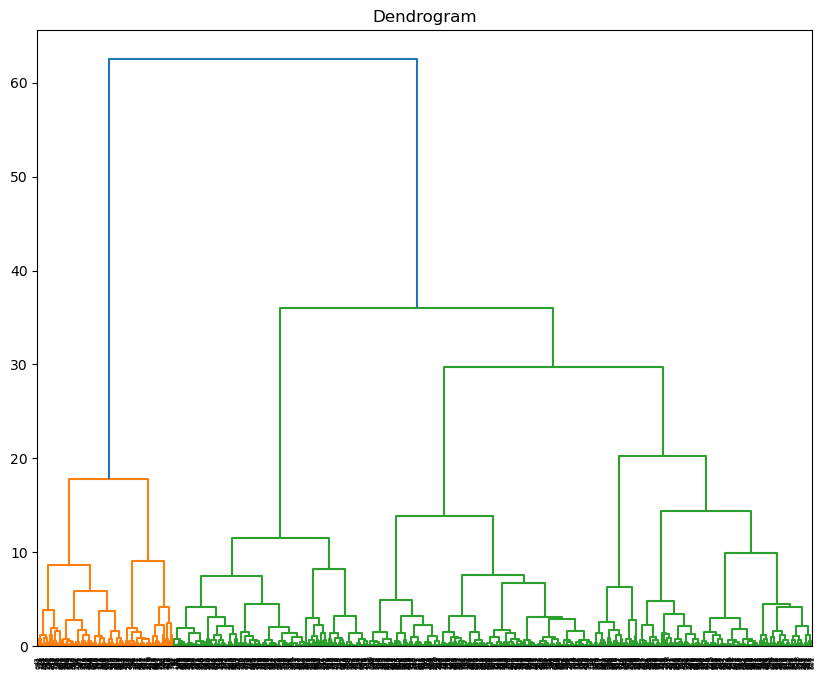

In [184]:
plt.figure(figsize =(10,8))
plt.title('Dendrogram')

linkage_method = linkage(srPCA, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

In [185]:
from sklearn.decomposition import PCA
from sklearn import cluster

In [186]:
pca = PCA(n_components=2)
srPCA = pca.fit_transform(sequence_representations)

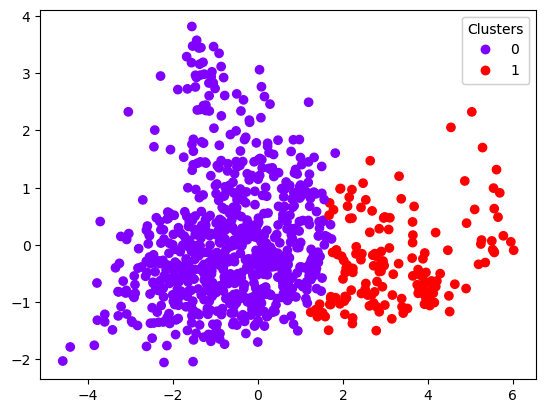

In [187]:
cluster_ea = AgglomerativeClustering(n_clusters=2, linkage='ward',affinity='euclidean')
c = cluster_ea.fit_predict(srPCA) 
 
fig, ax = plt.subplots()
scatter = ax.scatter(srPCA[:,0], srPCA[:,1], c = cluster_ea.fit_predict(srPCA), cmap='rainbow')
#scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()

In [194]:
aromaticity = [e.aromaticity() for e in biochemProps]

In [195]:
len(aromaticity)

879

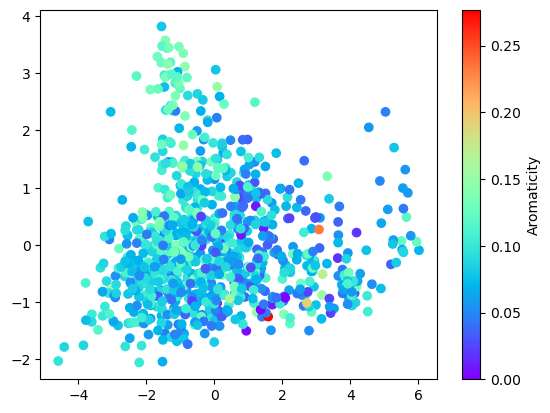

In [205]:
plt.scatter(srPCA[:,0], srPCA[:,1], c = aromaticity, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Aromaticity')
plt.show()

In [207]:
molecular_weight = [e.molecular_weight() for e in biochemProps]

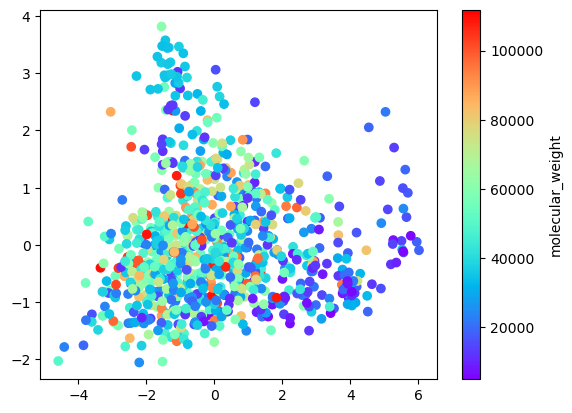

In [208]:
plt.scatter(srPCA[:,0], srPCA[:,1], c = molecular_weight, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('molecular_weight')
plt.show()

In [209]:
isoelectric_point = [e.isoelectric_point() for e in biochemProps]

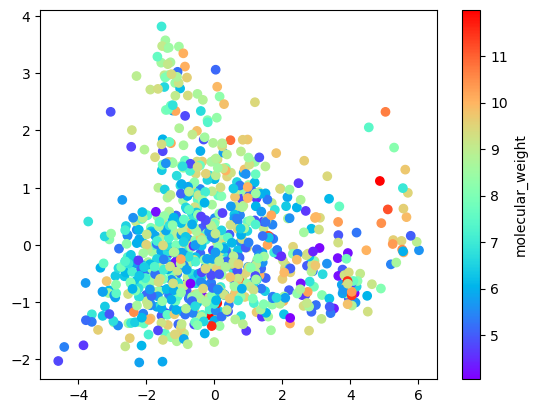

In [210]:
plt.scatter(srPCA[:,0], srPCA[:,1], c = isoelectric_point, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('molecular_weight')
plt.show()